# Study of 7th Graders

For our look into nodes and edges we will be using the moreno seventh grade dataset, which can be found here: http://konect.uni-koblenz.de/networks/moreno_seventh. 

This directed network contains proximity ratings between studetns from 29 seventh grade students from a school in Victoria. Among other questions the students were asked to nominate their preferred classmates for three different activities. A node represents a student. An edge between two nodes shows that the left student picked the right student as his answer. The edge weights are between 1 and 3 and show how often the left student chose the right student as his favourite.


In [ ]:
import pandas as pd
import networkx as nx

%matplotlib inline


# Quick Look at the Data
The data is split into 2 parts, students with their choices and weight and the genders by student number. We will load both sets of data, merge them, and take a look at what it shows.

In [12]:
seventh_link = "https://raw.githubusercontent.com/dquarshie89/Data-620/master/out.moreno_seventh_seventh"

seventh= pd.read_csv(seventh_link, delim_whitespace=True, header=None,
                           skiprows=[0,1], names=['Student1', 'Student2','Weight'])

gender_link = "https://raw.githubusercontent.com/dquarshie89/Data-620/master/ent.moreno_seventh_seventh.student.gender"

gender = pd.read_csv(gender_link, delim_whitespace=True, header=None)
gender = gender.reset_index()
gender.columns = ['New_ID','Gender']
gender['New_ID'] = gender.index + 1


total = pd.merge(seventh, gender, left_on='Student1', right_on='New_ID', how='inner')

total.columns = ['Student1', 'Student2','Weight',"New ID","Gender"]

total.head()



,Student1,Student2,Weight,New ID,Gender
0,1,2,1,1,male
1,1,3,1,1,male
2,1,4,2,1,male
3,1,5,2,1,male
4,1,6,3,1,male


In [13]:
summary = total.groupby('Gender').agg({'Student1':['nunique'],
                   'Weight':['mean']}).reset_index()
summary

,Gender,Student1,Weight
,,nunique,mean
0,female,17,1.926471
1,male,12,2.017442


Grouping the data we see that there are 29 total students, 17 females and 12 males. We can also see that
the average weight of which females and males picks the person to their right as their favorite is fairly 
even around 2. 

# Building the Graph

Now that we have the data loaded and have some details about the students let's build the network graph. We'll use networkx to build the edges and nodes and take a look at the diameter and radius of the graph. The diameter should show us the maximum eccentricity of any vertex in the graph or the longest distance between any two nodes. In our datset the diameter will tell us the maximum amount of hops before the left student picks another as their favorite. The radius should show us the minimum eccentricity of any vertex in the graph or the shorest distance between any two nodes. For our data the radius will tell us the minimum amount of hops before the left student picks another as their favorite.  


In [15]:
#Load data to graph using NetworkX
G = nx.from_pandas_edgelist(seventh,source="Student1",target="Student2")

#View graph info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 29
Number of edges: 250
Average degree:  17.2414


In [16]:
#Check that all nodes have a connection
print(nx.is_connected(G))

True


In [17]:
#Check that no node is connected to itself
print(seventh.loc[(seventh["Student1"] == seventh["Student2"])])

Empty DataFrame
Columns: [Student1, Student2, Weight]
Index: []


Looking at our outputs we see that we have 29 nodes and a total of 250 edges. The average degree for a node is 17, meaning that the average node has 17 connections. 

We also checked that all the nodes have at least one connection and that no node is connected to itself. Gladly no student picked him or herself as their favorite.

# Diameter and Radius

In [18]:
print("Diameter:{0}".format(nx.diameter(G)))
print("Radius:{0}".format(nx.radius(G)))

Diameter:2
Radius:1


NetworkX easily gives us our diameter and radius of the graph. We see that our diameter is 2 meaning the max hops for the left student to get to another student is 2 and radius is 1 meaning the min hops from one student to another is 1. With the sample size being small it makes sense that the max and min hops to get from one student to another are small and close. Assumptions can be made that the students just picked their favorite student since they were right next to each other. 

# Network Graph

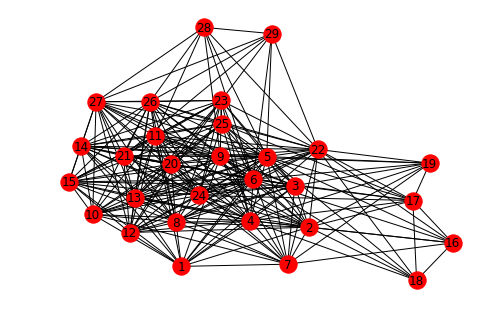

In [22]:
nx.draw(G, with_labels=True)

Here we finally see our network graph. The graph is centered around students 20,11,21,13, and 24 signifying that they have a lot of connections to the other students.